In [3]:
import yfinance as yf
import pandas as pd
import quantstats as qs

In [10]:
# (caminho, sheet_name = x) < para ler outra aba no excel

lista_acoes = pd.read_excel(r'C:\Users\PICHAU\Documents\Python\IBOV.xlsx')

lista_acoes

,Ações
0,RRRP3.SA
1,ALSO3.SA
2,ALPA4.SA
3,ABEV3.SA
4,ARZZ3.SA
...,...
83,VALE3.SA
84,VIIA3.SA
85,VBBR3.SA
86,WEGE3.SA


In [14]:
dados_cotacoes = yf.download(lista_acoes['Ações'].to_list(), start="2015-06-30")['Adj Close']

[*********************100%***********************]  88 of 88 completed


In [22]:
#troca indice que estava em formato de data para informação de data > para poder organizar

dados_cotacoes.index = pd.to_datetime(dados_cotacoes.index)

In [24]:
dados_cotacoes = dados_cotacoes.sort_index()

dados_cotacoes

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668836,5.577975,16.863308,19.890104,NaN,NaN,2.888299,15.603821,9.191127,9.112878,...,8.237456,11.697787,28.876308,3.501015,11.640821,NaN,6.839885,21.649677,6.399902,13.737410
2015-07-01,14.776979,5.665764,16.693331,19.898390,NaN,NaN,2.868498,15.404601,9.131997,9.084029,...,8.116556,11.697787,28.599752,3.475523,11.526258,NaN,6.839885,21.444885,6.558133,13.546079
2015-07-02,14.707457,5.631999,16.657547,20.088921,NaN,NaN,2.858599,15.359618,9.137668,9.269737,...,8.350299,11.778772,28.942160,3.492518,11.500799,NaN,6.839885,21.971502,6.588432,13.622611
2015-07-03,14.792423,5.638752,16.192352,19.964661,NaN,NaN,2.831375,15.211802,9.163962,9.163888,...,8.221337,11.700788,28.740231,3.424537,11.252582,NaN,7.655103,21.971502,6.675966,13.530775
2015-07-06,14.846499,5.604987,15.968701,19.964661,NaN,NaN,2.856123,15.327480,8.986467,8.984270,...,8.309999,11.592808,28.972885,3.552001,11.233487,NaN,7.655103,21.948092,6.669230,13.431281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,13.780000,7.850000,15.900000,61.209999,15.25,11.19,10.361298,37.209999,11.240000,12.570000,...,12.690000,26.299999,13.160000,6.640000,79.580002,12.93,1.850000,38.529999,39.889999,6.550000
2023-03-24,13.890000,8.150000,17.129999,62.150002,14.95,11.68,10.500509,37.590000,11.400000,12.710000,...,12.700000,27.070000,13.090000,6.620000,78.669998,13.03,1.870000,39.130001,40.509998,7.230000
2023-03-27,13.930000,8.120000,17.480000,62.360001,15.18,11.34,10.530340,37.610001,11.550000,12.940000,...,12.790000,27.250000,13.350000,6.620000,78.540001,13.43,1.930000,39.320000,41.189999,7.000000


In [28]:
#calcular retorno 6 meses e ajustar tabela > periods = tempo em meses para calcular media movel

r6 = dados_cotacoes.resample("m").last().pct_change(periods = 6).dropna(axis=0, how="all").drop("2023-03-31")

r6

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,-0.076286,-0.141645,-0.113005,NaN,NaN,-0.019676,-0.362491,-0.235068,-0.289905,...,-0.328767,-0.195200,-0.076003,-0.623786,-0.273276,NaN,-0.781977,-0.067328,-0.204485,-0.222841
2016-01-31,-0.026099,0.001545,-0.127168,-0.100444,NaN,NaN,0.030454,-0.340404,-0.260394,-0.308186,...,-0.321619,-0.083274,-0.150474,-0.783715,-0.445144,NaN,-0.838961,-0.182059,-0.167808,-0.177091
2016-02-29,-0.054421,0.251857,-0.083851,-0.178820,NaN,NaN,0.116932,-0.208608,-0.034314,-0.029977,...,-0.210227,-0.000003,-0.003877,-0.697987,-0.327719,NaN,-0.707792,0.000862,-0.202454,0.023256
2016-03-31,-0.016942,0.232223,0.094483,0.183737,NaN,NaN,0.435515,0.347494,0.330233,0.323654,...,0.066578,-0.090481,0.052331,-0.459701,-0.067891,NaN,-0.110294,0.258974,-0.078546,-0.159574
2016-04-30,0.031436,0.167526,0.058898,0.164968,NaN,NaN,0.561556,0.434324,0.376729,0.421211,...,-0.071865,-0.157549,0.087326,-0.100719,0.154162,NaN,0.024346,0.138834,0.068157,-0.207022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,0.101928,0.120408,0.049572,0.184724,0.297120,-0.265817,0.151202,0.140424,0.136441,0.122928,...,0.004674,0.040994,0.057887,-0.360743,-0.152247,-0.119768,0.053872,-0.213826,0.349226,0.000620
2022-11-30,0.121917,-0.229885,-0.072501,0.127067,0.265783,-0.389359,0.014828,-0.013285,-0.170037,-0.227444,...,-0.073763,0.091724,-0.011830,-0.286496,0.045730,-0.133827,-0.305732,-0.246783,0.549908,-0.289246
2022-12-31,0.140676,-0.212121,0.062461,0.146957,0.367008,-0.110662,0.215157,0.068642,-0.056897,-0.113656,...,0.003379,0.191764,0.024370,-0.172254,0.225246,-0.027580,0.250000,-0.176479,0.467673,-0.221882


In [ ]:
# classificar e retirar empresas que não faziam parte do ibovespa 
# (for data in r6.index: for empresa in r6.columns: if empresa.replace(".SA","") 
# not in tabela ibov que não peguei.loc[:, data].to_list())
# r6.loc[data, empresa] = pd.NA(troca para NaN o dado) 

In [31]:
# ascending = False troca para decrescente.
# lambda aplica x a todos os elementos que ela receber

rankings = r6.rank(axis = 1, ascending = False).applymap(lambda x: 1 if x < 11 else 0)

rankings

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-29,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-03-31,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-30,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2022-11-30,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2022-12-31,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
retorno_mensal = dados_cotacoes.resample("m").last().pct_change(periods = 1)

retorno_mensal = retorno_mensal.drop(retorno_mensal.index[:7], axis = 0)

rankings.index = retorno_mensal.index

retorno_mensal

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.045378,0.023876,-0.066749,-0.095238,NaN,NaN,-0.057851,-0.060380,-0.043574,-0.057669,...,-0.071429,0.044151,-0.017701,-0.451613,-0.254029,NaN,-0.173333,-0.083431,0.034114,-0.160574
2016-02-29,-0.048030,0.219479,-0.023179,-0.062632,NaN,NaN,0.132553,-0.022383,0.188886,0.176957,...,0.091052,-0.027778,0.064734,0.058823,0.215020,NaN,0.814516,0.095161,-0.142028,0.089667
2016-03-31,0.065760,-0.123003,0.075932,0.311061,NaN,NaN,0.320998,0.475474,0.293587,0.269139,...,0.152518,-0.135238,0.111854,1.011111,0.282811,NaN,0.075556,0.130946,0.069196,-0.071317
2016-04-30,0.031383,0.193548,0.113612,0.038544,NaN,NaN,0.119218,0.118360,0.027805,0.053571,...,-0.020881,0.050111,0.036348,0.381216,0.299670,NaN,0.227522,-0.009379,0.080427,0.034552
2016-05-31,-0.014440,0.084495,-0.055233,0.026240,NaN,NaN,-0.067893,-0.249184,-0.126904,-0.119033,...,-0.068063,0.050355,-0.057581,-0.332000,-0.277806,NaN,-0.124579,-0.030320,-0.052042,-0.085088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30,-0.005000,-0.237250,-0.175794,-0.142871,0.011604,-0.238686,-0.153591,-0.042371,-0.172222,-0.214762,...,-0.015151,-0.069361,0.058911,0.081604,0.276777,-0.094247,-0.303514,-0.078915,-0.031777,-0.287043
2022-12-31,-0.039883,-0.099701,-0.050251,-0.117489,-0.027072,-0.103420,0.039749,-0.005419,-0.019816,-0.026400,...,-0.031473,-0.104990,-0.111972,-0.084399,0.040515,-0.034995,0.100917,0.007884,-0.011129,-0.115652
2023-01-31,-0.059229,-0.097480,0.058789,0.119489,0.009245,0.076294,-0.014150,0.171898,-0.023275,-0.036053,...,-0.049194,0.097045,0.045995,0.191341,0.063344,0.058521,0.000000,0.120607,-0.007011,0.015733


In [43]:
# cruzar matrizes

retorno_modelo = (retorno_mensal * rankings).sum(axis = 1)/10

retorno_modelo

Date
2016-01-31   -0.020538
2016-02-29    0.053918
2016-03-31    0.051348
2016-04-30    0.154154
2016-05-31   -0.109839
                ...   
2022-11-30   -0.140973
2022-12-31   -0.024385
2023-01-31    0.063210
2023-02-28   -0.105828
2023-03-31    0.000489
Freq: M, Length: 87, dtype: float64

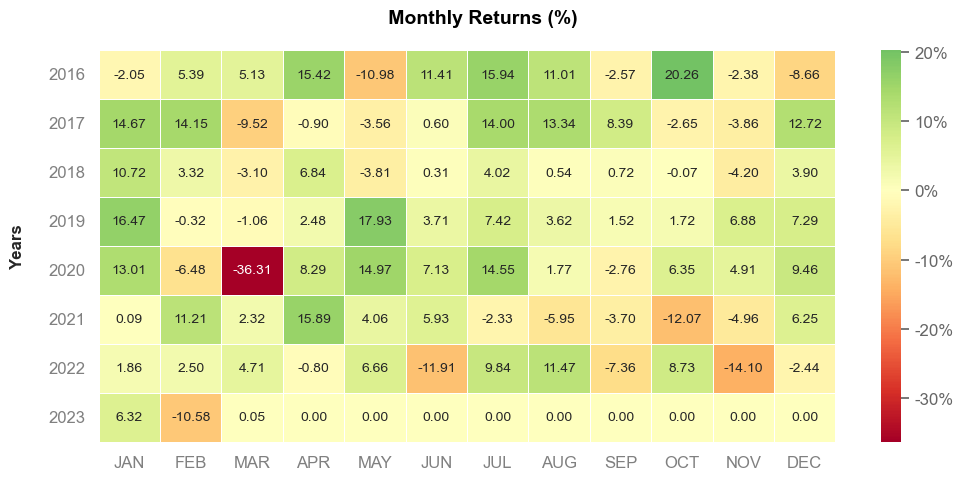

In [44]:
#quantstats para gerar heatmap de retornos

qs.extend_pandas()

retorno_modelo.plot_monthly_heatmap()

In [45]:
ibovespa = yf.download("^BVSP", start = "2015-12-30", end = "2023-03-31")['Adj Close']

ibovespa = ibovespa.resample("m").last().pct_change().dropna()

ibovespa

[*********************100%***********************]  1 of 1 completed


Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-11-30   -0.030602
2022-12-31   -0.021825
2023-01-31    0.031818
2023-02-28   -0.075750
2023-03-31   -0.014542
Freq: M, Name: Adj Close, Length: 87, dtype: float64

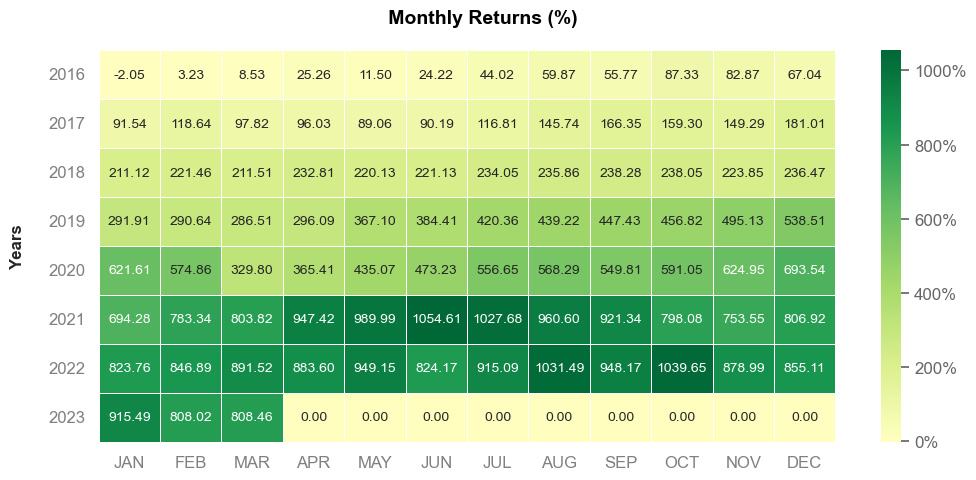

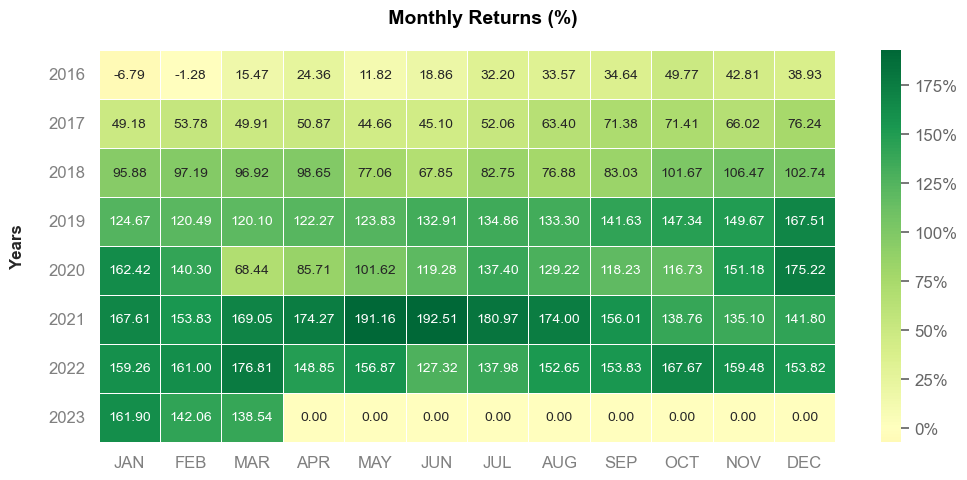

In [46]:
retorno_acum_modelo = (1 + retorno_modelo).cumprod() - 1
retorno_acum_ibov = (1 + ibovespa).cumprod() - 1

retorno_acum_modelo.plot_monthly_heatmap()
retorno_acum_ibov.plot_monthly_heatmap()

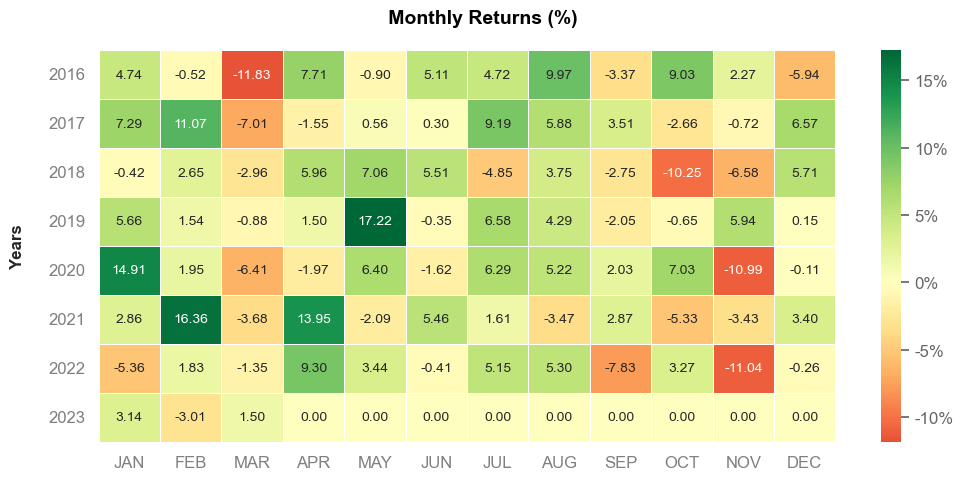

In [47]:
ganhos_modelo = retorno_modelo - ibovespa

ganhos_modelo.plot_monthly_heatmap()